In [1]:
import random

import numpy as np
from numpy import arange
from numpy.random import seed
from numpy.random import randn
from numpy import mean, median, std, var
from numpy import percentile

import matplotlib.pyplot as plt

from scipy.stats import poisson, norm

ModuleNotFoundError: No module named 'numpy'

# Random Variables (RVs)

In [2]:
import random

def flip_coin():
  # returns 0 or 1 with probability 0.5
  return random.choice([0,1])

In [3]:
result = flip_coin()
print(result)

1


## Discrete RVs -- Poisson Distribution

 A Poisson random variable gives the probability of a given number of events in a fixed interval of time (or space). It makes the Poisson assumption that events occur with a known constant mean rate and independently of the time since the last event.

The probability mass function (**PMF**) of a Poisson RV:
$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots $

**Expectation**:
$\mathbb{E}[X] = \lambda $

**Variance**:
$\text{Var}(X) = \lambda $

In [4]:
# Using scipy
X = poisson(2.5)
print(X.pmf(2))

0.25651562069968376


In [5]:
print("Expectation: ", X.mean())
print("Variance: ", X.var())

Expectation:  2.5
Variance:  2.5


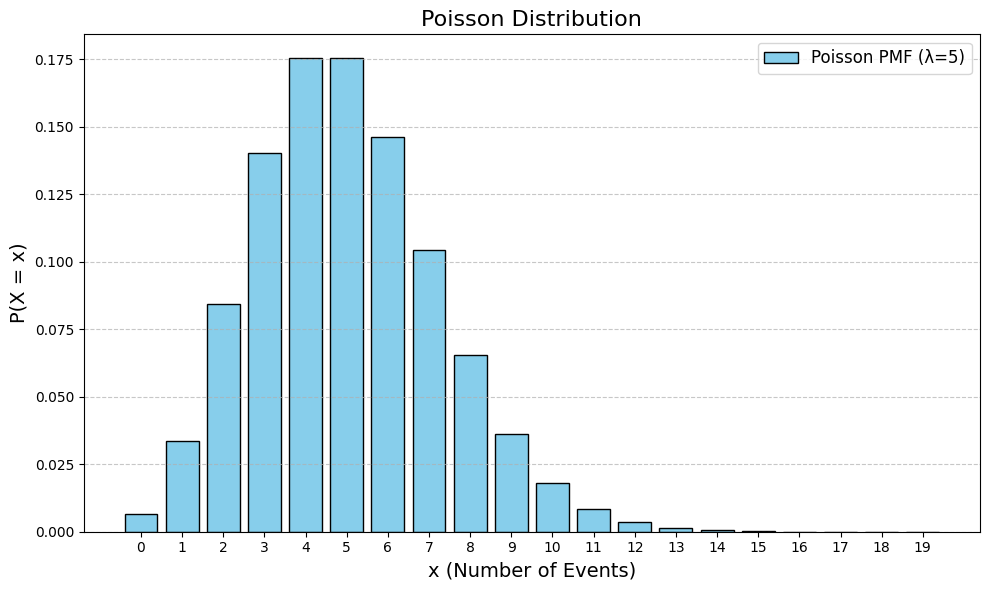

In [6]:
# Parameters for the Poisson distribution
lambda_param = 5  # Mean and variance of the Poisson distribution

# Generate x values (possible values for the Poisson random variable)
x = np.arange(0, 20, 1)  # Range of discrete values for the random variable

# Compute the PMF for the Poisson distribution
pmf_values = poisson.pmf(x, mu=lambda_param)

# Plot the Poisson PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, width=0.8, color='skyblue', edgecolor='black', label=f'Poisson PMF (λ={lambda_param})')

# Add labels, title, and legend
plt.title('Poisson Distribution', fontsize=16)
plt.xlabel('x (Number of Events)', fontsize=14)
plt.ylabel('P(X = x)', fontsize=14)
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Continuous RVs - Gaussian Distribution

**The (General) Normal Distribution**:

The standard normal distribution is centered at 0 with a variance of 1. In general, we can
- scale the bell shape to be as wide as we want,
- shift the bell shape to be centered wherever we want.

If $Z$ is standard normal, then
$$ X = \mu + \sigma Z $$
is $\text{Normal}(\mu, \sigma)$. The parameter $\mu$ is the expected value, and the parameter $\sigma$ is the standard deviation. (So $\sigma^2$ is the variance.)

The **pdf** of random variable $Z$ with a gaussian / normal distribution is shown below

$$ p(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}. $$

It is defined for all real values $z$, from $-\infty$ to $\infty$.


### Generate and plot an idealized gaussian

In [ ]:
## Using scipy

# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# y-axis as the gaussian
y_axis = norm.pdf(x_axis, 0, 1)
# plot data
plt.plot(x_axis, y_axis)
plt.show()

In [ ]:
# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# y-axis as the gaussian
y_axis = norm.pdf(x_axis, 0, 1)
# plot data
plt.plot(x_axis+5, y_axis)
plt.show()

**Cumulative density function (CDF) of Gaussian:**

To calculate probabilities, we integrate the pdf. over the relevant region. For example,

$$ P(Z \leq 1) = \int_{-\infty}^1 \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}\,dz. $$

Unlike other continuous distributions we have studied, the p.d.f. $p(z)$ has no elementary antiderivative. That means that you will not be able to evaluate this integral by paper and pencil, using techniques you learned in calculus. It has to be evaluated numerically. Fortunately, you can do this easily in Scipy.

For example, $P(Z \leq 1)$ is just the CDF evaluated at $1$. The c.d.f. of the standard normal distribution is often represented by $\Phi(z)$. So we need to calculate $\Phi(1)$.

In [ ]:
# Calculate the CDF at x = 1 using Scipy
cdf_at_1 = norm.cdf(1, loc=0, scale=1)  # loc=mean, scale=std
print(cdf_at_1)

In [ ]:
norm.mean(loc=0, scale=1)    # loc=mean, scale=std

In [ ]:
norm.var(loc=0, scale=1)

### Generate a sample of random gaussians

In [ ]:
# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# histogram of generated data
plt.hist(data)
plt.show()

In [ ]:
# generate a sample of random gaussians -more bins

# histogram of generated data
plt.hist(data, bins=100)
plt.show()

In [ ]:
# calculate mean
result = mean(data)
print('Mean: %.3f' % result)

In [ ]:
# calculate median
result = median(data)
print('Median: %.3f' % result)

In [ ]:
# calculate variance
result = var(data)
print('Variance: %.3f' % result)

In [ ]:
# calculate standard deviation
result = std(data)
print('Standard Deviation: %.3f' % result)

### Generate and plot gaussians with different variance

In [ ]:
# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# plot low variance
plt.plot(x_axis, norm.pdf(x_axis, 0, 0.5))
# plot high variance
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

# Functions of RVs

## Transformation of Densities

In [ ]:
# Define the transformation function and its inverse
def g(y):
    return (np.log(y)-np.log(1-y)+5)  # Invers of Sigmoid function

def g_inv(x):
    return 1/(1+np.exp(-x+5))  # the sigmoid function

In [ ]:
# Define the PDF of X (e.g., Normal distribution)
def px(x):
    return norm.pdf(x, loc=XX, scale=XX)  # Normal PDF with mean=XX, std=XX

# Define the transformed PDF p_Y(y)
def py(y):
    x = g(y)
    dx_dy = 1/(y * (1 - y))  # Derivative of g_inv(x)
    return px(x) * dx_dy  # Change of variable formula

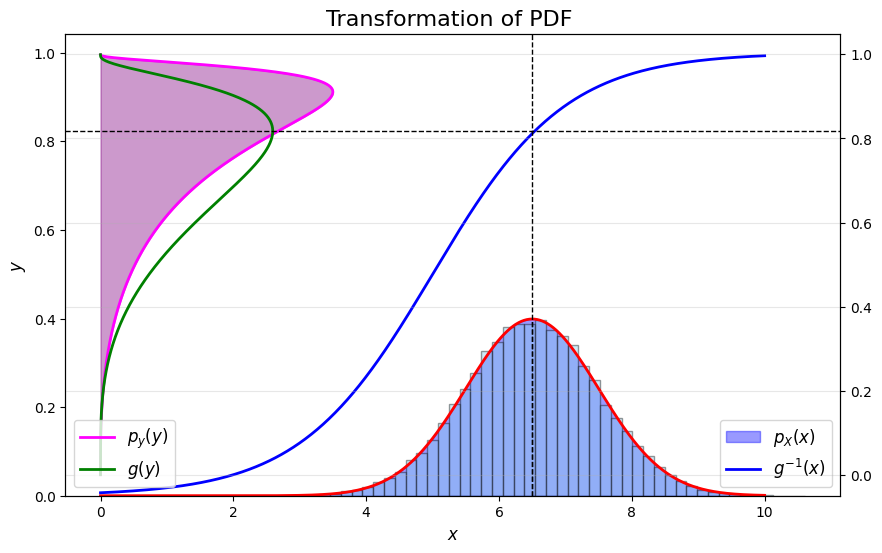

In [ ]:
# to be added